In [9]:
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')

print(data.head())

print(data.info())
print(data.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [10]:
print(data.isnull().sum())

data.fillna(data.median(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [16]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Logistic Regression Report:\n", classification_report(y_test, lr_preds))

dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Decision Tree Report:\n", classification_report(y_test, dt_preds))

lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
dt_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print("Logistic Regression ROC-AUC:", lr_auc)
print("Decision Tree ROC-AUC:", dt_auc)




Logistic Regression Accuracy: 0.7532467532467533
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Decision Tree Accuracy: 0.7532467532467533
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

Logistic Regression ROC-AUC: 0.8146923783287419
Decision Tree ROC-AUC: 0.7515151515151516


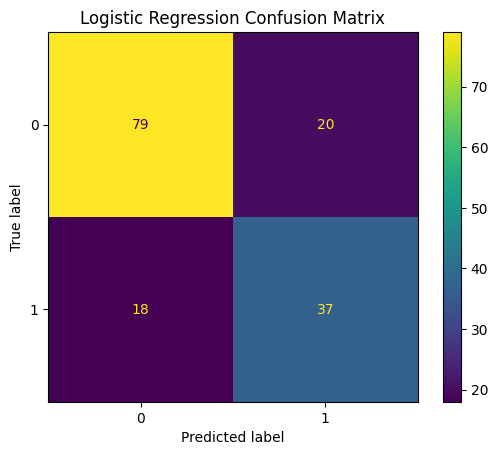

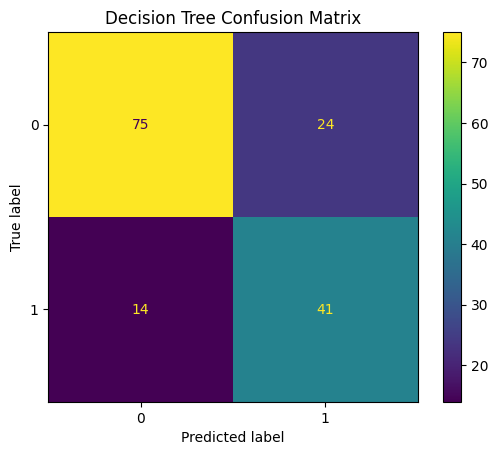

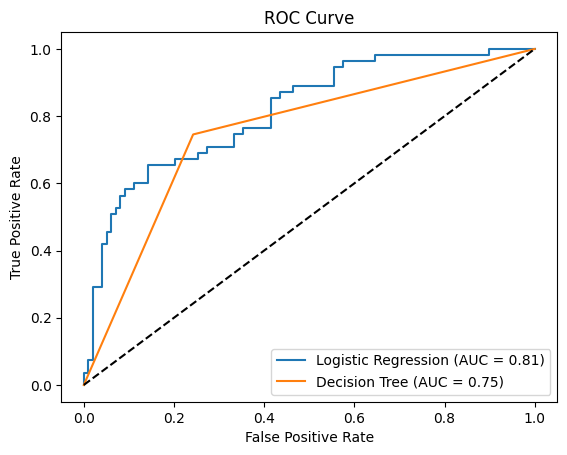

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

cm_lr = confusion_matrix(y_test, lr_preds)
ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()
cm_dt = confusion_matrix(y_test, dt_preds)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


###Improve the models using techniques like hyperparameter tuning.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score for Logistic Regression:", grid_search_lr.best_score_)
best_lr_model = grid_search_lr.best_estimator_

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score for Logistic Regression: 0.7655204584832733


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

In [21]:
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_lr.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score for Logistic Regression:", grid_search_lr.best_score_)
best_lr_model = grid_search_lr.best_estimator_

Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score for Logistic Regression: 0.7655204584832733
